## Performance Plots

A clean notebook to start using trial by trial data frame to make performance plots for animals across sessions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datajoint as dj
import pandas as pd
import os
import seaborn as sns
import pandas as pd
from pathlib import Path
from datetime import date, timedelta

from io_utils import *
from performance_plots import * 

# settings
%load_ext autoreload
%autoreload 2
dj.blob.use_32bit_dims = True # necessary for pd.blob read
 

In [2]:
df = fetch_latest_protocol_data(
        ['R502'], 
        save_dir=None,
        crashed_trials_report=False,
        print_session_id=True
    )
antibias_working = pd.Timestamp(2022,8,5) # the day antibias was fixed
sb_only = pd.Timestamp(2022,8,24)
post_anti_df = df[(df['date'] > antibias_working)]
sb_only_df = df[(df['date'] > sb_only)]

[2022-09-29 11:37:11,238][INFO]: Connecting jbreda@datajoint01.pni.princeton.edu:3306
[2022-09-29 11:37:11,612][INFO]: Connected jbreda@datajoint01.pni.princeton.edu:3306


preparing session id: 879475 for R502
preparing session id: 879666 for R502
preparing session id: 879815 for R502
preparing session id: 879981 for R502
preparing session id: 880128 for R502
preparing session id: 880144 for R502
preparing session id: 880203 for R502
preparing session id: 880207 for R502
preparing session id: 880268 for R502
preparing session id: 880326 for R502
preparing session id: 880360 for R502
preparing session id: 880387 for R502
preparing session id: 880415 for R502
preparing session id: 880438 for R502
preparing session id: 880488 for R502
preparing session id: 880492 for R502
preparing session id: 880540 for R502
preparing session id: 880563 for R502
preparing session id: 880578 for R502
preparing session id: 880590 for R502
preparing session id: 880604 for R502
preparing session id: 880674 for R502
preparing session id: 880858 for R502
preparing session id: 881062 for R502
preparing session id: 881233 for R502
preparing session id: 881402 for R502
preparing se

In [3]:
def plot_stage_and_trials(df, ax, title=None):
    title = "Stage & Trials Plot" if title is None else title
    sns.lineplot(data=df.groupby('date').max().trial, color="darkorange", ax=ax)
    _ = plt.xticks(rotation=45)
    ax.set(ylabel = "trials per session", title=title)

    ax2 = ax.twinx()
    sns.lineplot(data=df.groupby('date').max().stage, drawstyle='steps-post', color="black", ax=ax2)
    ax2.set_yticks(np.arange(1,df['stage'].max() + 1, 1))
    ax2.set(ylabel = "stage number")
    
    ax2.legend(['stage'])


def plot_stage(df, ax, title=None, **kwargs):
    title = "Stage Plot" if title is None else title
    sns.lineplot(data=df.groupby('date').max().stage, 
                drawstyle='steps-post', ax=ax, **kwargs)

    _ = plt.xticks(rotation=45)
    _ = plt.yticks(np.arange(1,11, 1))
    _ = ax.set(ylabel = "stage number", title=title)
    sns.despine()

def plot_trials(df, ax, title=None, **kwargs):
    title = "Trial Plot" if title is None else title
    sns.lineplot(data=df.groupby('date').max().trial, 
                ax=ax, **kwargs)

    _ = plt.xticks(rotation=45)
    _ = ax.set(ylabel = "trials per session", title=title)
    sns.despine()

def plot_hits(df, ax, title=None, **kwargs):
    title = "Hit Plot" if title is None else title
    sns.lineplot(data=df, x="date", y="hits", 
                 ci=None, ax=ax, **kwargs)
    
    _ = plt.xticks(rotation=45)
    _ = ax.set(ylabel="fraction correct", title=title,ylim=[0,1])
    sns.despine()

def plot_viols(df, ax, title=None, **kwargs):
    title = "Violation Plot" if title is None else title
    sns.lineplot(data=df, x="date", y="violations", 
                ci=None, ax=ax, **kwargs)
    _ = plt.xticks(rotation=45)
    _ = ax.set(ylabel="fraction violation", title=title,ylim=[0,1])
    sns.despine()


def plot_hits_and_viols(df, ax, title=None):
    title = "Hit & Viol Plot" if title is None else title
    
    sns.lineplot(data=df, x="date", y="hits",
                 color='seagreen', ci=None, ax=ax)
    sns.lineplot(data=df, x="date", y="violations", 
                 color='firebrick', ci=None, ax=ax)
    
    _ = plt.xticks(rotation=45)
    ax.legend(['hits', 'viols'])
    _ = ax.set(ylabel="fraction correct | viol", title=title,ylim=[0,1])
    sns.despine()


def plot_pair_performance(df, ax, title=None):
    title = "Pair Perf Plot" if title is None else title

    hue_order = ["3.0, 3.0", "12.0, 12.0", "3.0, 12.0", "12.0, 3.0"]
    palette = ["skyblue", "steelblue", "thistle", "mediumorchid"]
    sns.lineplot(data=df.groupby(['date','sound_pair']).mean(), 
    x = "date", y="hits", hue="sound_pair", hue_order=hue_order, palette=palette)
    
    _ = plt.xticks(rotation=45)
    _ = ax.set(ylim=[0,1], ylabel="fraction correct")
    sns.despine()
    # ax.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0,frameon=False)




Text(0.5, 1.0, 'WM Rule')

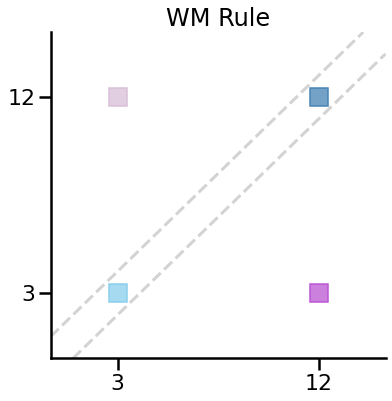

In [30]:
stimuli  = [(3,3), (12,12), (3,12), (12,3)]
colors = ["skyblue", "steelblue", "thistle", "mediumorchid"]
stim_range =  [3, 12]
x_lim =[0,15]
y_lim =[0,15]
sns.set_context("poster")

fig, ax = plt.subplots(figsize = (6,6))
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_xticks(stim_range)
ax.set_yticks(stim_range)
sns.despine()

for s,c in zip(stimuli,colors):
  ax.scatter(s[0],s[1], marker=",", s=300, c=c, alpha= 0.75)

plt.axline((0,1), slope=1, color='lightgray', linestyle='--')
plt.axline((1,0), slope=1, color='lightgray', linestyle='--')
plt.title("WM Rule")

Text(0.5, 1.0, 'Sb Rule')

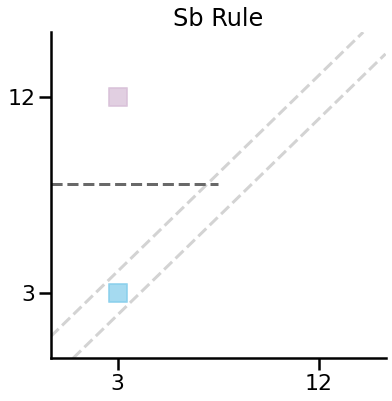

In [18]:
stimuli  = [(3,3),(3,12)]
colors = ["skyblue", "thistle"]
stim_range =  [3, 12]
x_lim =[0,15]
y_lim =[0,15]
sns.set_context("poster")

fig, ax = plt.subplots(figsize = (6,6))
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_xticks(stim_range)
ax.set_yticks(stim_range)
sns.despine()

for s,c in zip(stimuli,colors):
  ax.scatter(s[0],s[1], marker=",", s=300, c=c, alpha= 0.75)

plt.axline((0,1), slope=1, color='lightgray', linestyle='--')
plt.axline((1,0), slope=1, color='lightgray', linestyle='--')
plt.axhline(y=8, xmax=0.5, color = 'dimgray', linestyle='--')
plt.title("Sb Rule")

Text(0.5, 1.0, 'Sa Rule')

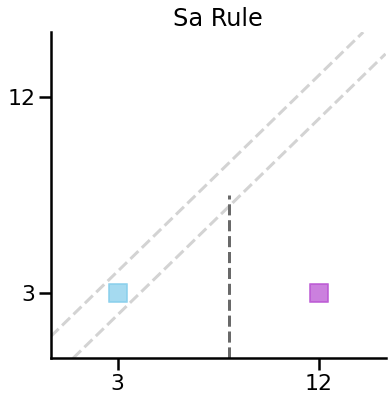

In [19]:
stimuli  = [(3,3), (12,3)]
colors = ["skyblue", "mediumorchid"]
stim_range =  [3, 12]
x_lim =[0,15]
y_lim =[0,15]
sns.set_context("poster")

fig, ax = plt.subplots(figsize = (6,6))
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_xticks(stim_range)
ax.set_yticks(stim_range)
sns.despine()

for s,c in zip(stimuli,colors):
  ax.scatter(s[0],s[1], marker=",", s=300, c=c, alpha= 0.75)

plt.axline((0,1), slope=1, color='lightgray', linestyle='--')
plt.axline((1,0), slope=1, color='lightgray', linestyle='--')
plt.axvline(x=8, ymax=0.5, color = 'dimgray', linestyle='--')
plt.title("Sa Rule")

Text(0.5, 1.0, 'Sa/Sb Merge')

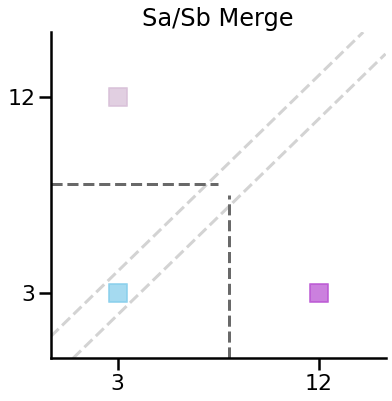

In [20]:
stimuli  = [(3,3), (3,12), (12,3)]
colors = ["skyblue", "thistle", "mediumorchid"]
stim_range =  [3, 12]
x_lim =[0,15]
y_lim =[0,15]
sns.set_context("poster")

fig, ax = plt.subplots(figsize = (6,6))
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_xticks(stim_range)
ax.set_yticks(stim_range)
sns.despine()

for s,c in zip(stimuli,colors):
  ax.scatter(s[0],s[1], marker=",", s=300, c=c, alpha= 0.75)

plt.axline((0,1), slope=1, color='lightgray', linestyle='--')
plt.axline((1,0), slope=1, color='lightgray', linestyle='--')
plt.axvline(x=8, ymax=0.5, color = 'dimgray', linestyle='--')
plt.axhline(y=8, xmax=0.5, color = 'dimgray', linestyle='--')
plt.title("Sa/Sb Merge")

Text(0.5, 1.0, '1/2 XOR')

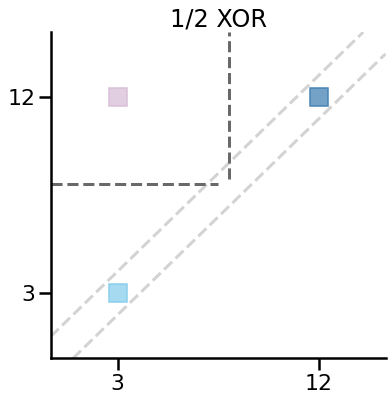

In [7]:
stimuli  = [(3,3), (3,12), (12,12)]
colors = ["skyblue", "thistle", "steelblue"]
stim_range =  [3, 12]
x_lim =[0,15]
y_lim =[0,15]
sns.set_context("poster")

fig, ax = plt.subplots(figsize = (6,6))
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_xticks(stim_range)
ax.set_yticks(stim_range)
sns.despine()

for s,c in zip(stimuli,colors):
  ax.scatter(s[0],s[1], marker=",", s=300, c=c, alpha= 0.75)

plt.axline((0,1), slope=1, color='lightgray', linestyle='--')
plt.axline((1,0), slope=1, color='lightgray', linestyle='--')
plt.axvline(x=8, ymin=0.55, ymax=1, color = 'dimgray', linestyle='--')
plt.axhline(y=8, xmax=0.5, color = 'dimgray', linestyle='--')
plt.title("1/2 XOR")

Text(0.5, 1.0, 'Sa Rule')

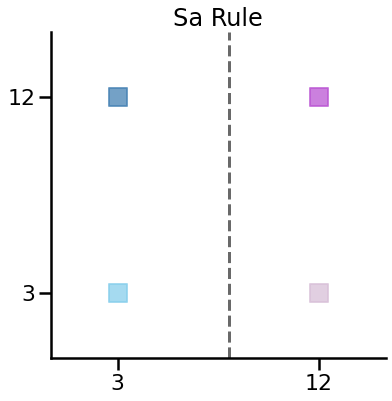

In [27]:
stimuli  = [(3,3), (12,12), (3,12), (12,3)]
colors = ["skyblue", "mediumorchid","steelblue", "thistle"]
stim_range =  [3, 12]
x_lim =[0,15]
y_lim =[0,15]
sns.set_context("poster")

fig, ax = plt.subplots(figsize = (6,6))
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_xticks(stim_range)
ax.set_yticks(stim_range)
sns.despine()

for s,c in zip(stimuli,colors):
  ax.scatter(s[0],s[1], marker=",", s=300, c=c, alpha= 0.75)
plt.axvline(x=8, ymax=1, color = 'dimgray', linestyle='--')


plt.title("Sa Rule")

Text(0.5, 1.0, 'Sb Rule')

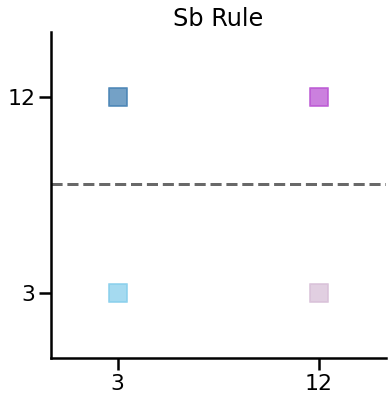

In [29]:
stimuli  = [(3,3), (12,12), (3,12), (12,3)]
colors = ["skyblue", "mediumorchid","steelblue", "thistle"]
stim_range =  [3, 12]
x_lim =[0,15]
y_lim =[0,15]
sns.set_context("poster")

fig, ax = plt.subplots(figsize = (6,6))
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_xticks(stim_range)
ax.set_yticks(stim_range)
sns.despine()

for s,c in zip(stimuli,colors):
  ax.scatter(s[0],s[1], marker=",", s=300, c=c, alpha= 0.75)
plt.axhline(y=8, xmax=1, color = 'dimgray', linestyle='--')


plt.title("Sb Rule")

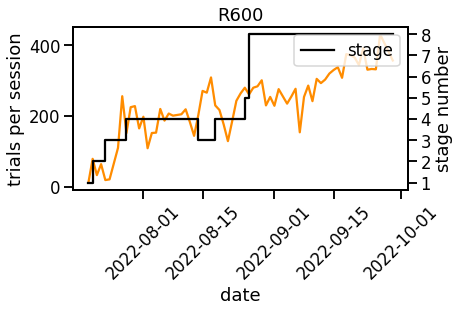

In [8]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
plot_stage_and_trials(df, ax, 'R600')

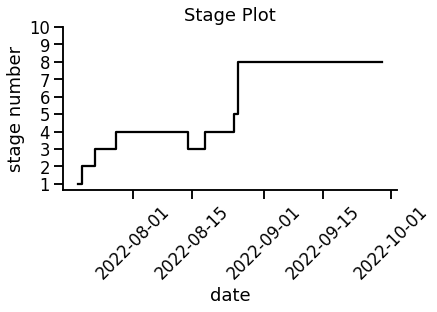

In [9]:
fig, ax = plt.subplots(1,1, figsize=(6,3))

plot_stage(df, ax=ax, color='black')

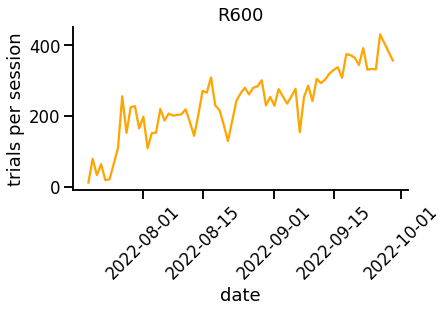

In [10]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
plot_trials(df, ax, title='R600', color='orange')

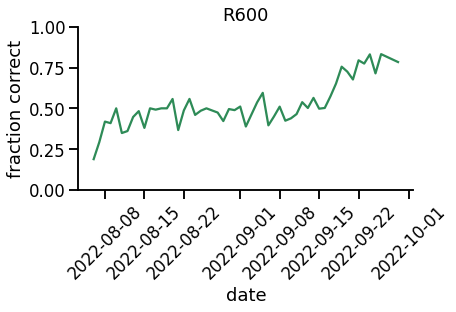

In [11]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
plot_hits(post_anti_df, ax, title='R600', color = 'seagreen')

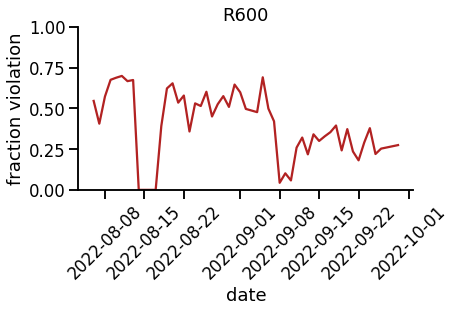

In [12]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
plot_viols(post_anti_df, ax, title='R600', color='firebrick')

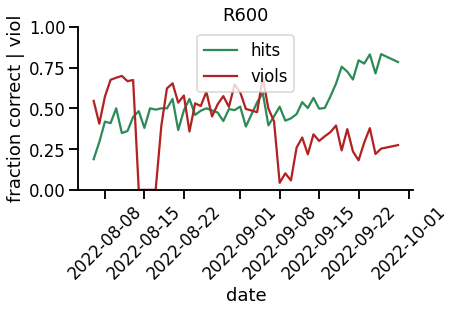

In [13]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
plot_hits_and_viols(post_anti_df, ax, title='R600')

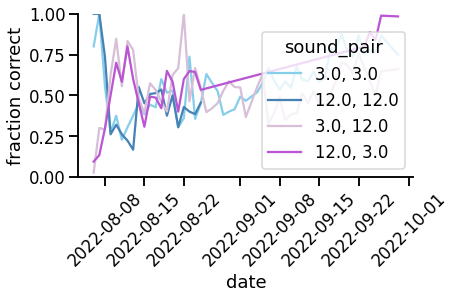

In [14]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
plot_pair_performance(post_anti_df, ax)

In [15]:
d = date.today() - timedelta(days=7)
d

datetime.date(2022, 9, 22)

## Plots across animals

Making these plots for meeting w/ Javier on 8/24


In [16]:
df_all = fetch_latest_protocol_data()
antibias_working = pd.Timestamp(2022,8,5) # the day antibias was fixed
df_antib = post_anti_df = df_all[(df_all['date'] > antibias_working)]

fetched 66 sessions for R500


KeyboardInterrupt: 

#### Trials 

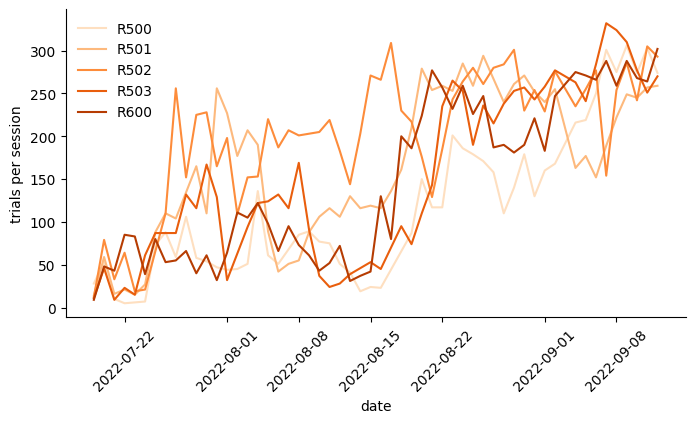

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
sns.lineplot(data = df_all.groupby(['animal_id', 'date']).max(),
                x ="date", y="trial", hue="animal_id", palette='Oranges', ax=ax)

_ = plt.xticks(rotation=45)
_ = ax.set(ylabel = "trials per session")
sns.despine()

ax.legend(frameon=False)

#### Hits

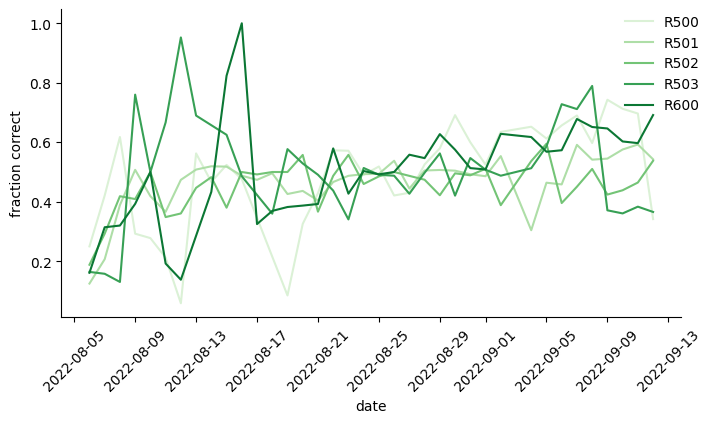

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

sns.lineplot(data = df_antib.groupby(['animal_id', 'date']).mean(),
                x ="date", y="hits", hue="animal_id", palette='Greens', ax=ax)

_ = plt.xticks(rotation=45)
_ = ax.set(ylabel = "fraction correct")
sns.despine()

ax.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0,frameon=False)


#### Violations

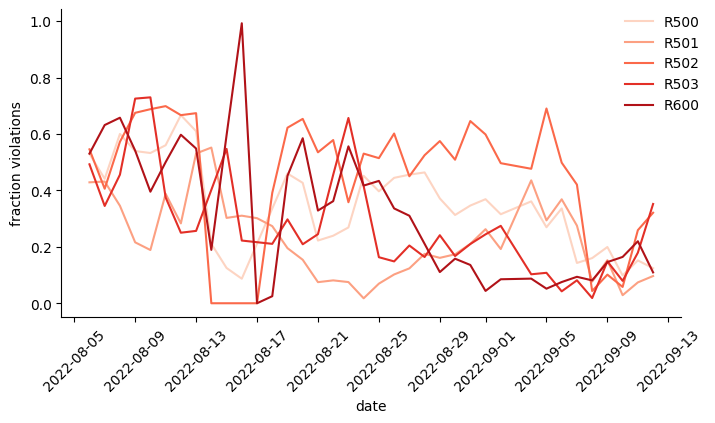

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

sns.lineplot(data = df_antib.groupby(['animal_id', 'date']).mean(),
                x ="date", y="violations", hue="animal_id", palette='Reds', ax=ax)

_ = plt.xticks(rotation=45)
_ = ax.set(ylabel = "fraction violations")
sns.despine()
ax.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0,frameon=False)

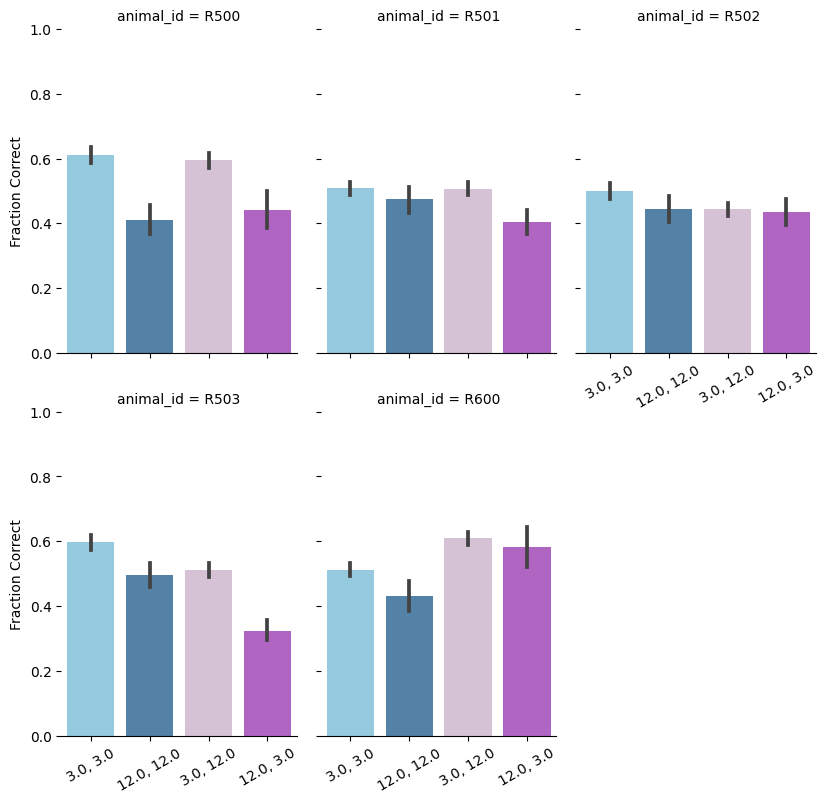

In [ ]:
g = sns.catplot(x="sound_pair", y="hits", col="animal_id",
                data=df_antib, kind="bar", col_wrap=3,
                height=4, aspect=.7, 
                order = ["3.0, 3.0", "12.0, 12.0", "3.0, 12.0", "12.0, 3.0"],
                palette=["skyblue", "steelblue", "thistle", "mediumorchid"])

(g.set_xticklabels(rotation=30) 
  .despine(left=True)
  .set(ylim=[0,1])
  .set_axis_labels("", "Fraction Correct"))

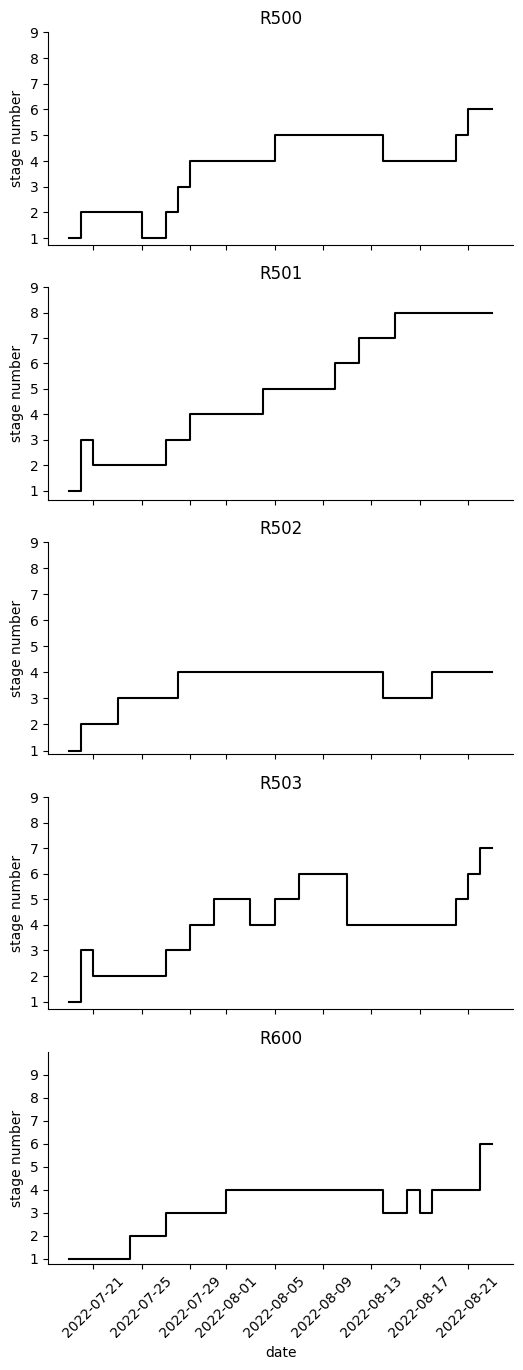

In [ ]:
fig,ax = plt.subplots(5, 1, figsize=(6, 16), sharex=True)
counter = 0
for _id, animal_df in df_all.groupby('animal_id'):
    plot_stage(animal_df,ax= ax[counter], title=_id, color="black")
    
    ax[counter].set_ylim
    ax[counter].set_yticks(np.arange(1,9 + 1, 1))
    counter += 1
# plt.yticks(np.arange(1,9 + 1, 1))


In [ ]:
df_stable.query("animal_id == 'R500'")

,trial,animal_id,date,session_id,hits,violations,temperror,sides,result,sa,sb,delay,fixation,timeouts,helper,stage,is_match,sound_pair
1534,1,R500,2022-08-19,882621,0,0,0,l,2,3.0,3.0,0.1,1.10,0.500,0,4,True,"3.0, 3.0"
1535,2,R500,2022-08-19,882621,1,0,0,r,1,12.0,3.0,0.1,0.41,NaN,0,4,False,"12.0, 3.0"
1536,3,R500,2022-08-19,882621,0,0,0,l,2,12.0,12.0,0.1,0.42,0.500,0,4,True,"12.0, 12.0"
1537,4,R500,2022-08-19,882621,<NA>,1,<NA>,l,3,12.0,12.0,0.1,0.42,0.500,0,4,True,"12.0, 12.0"
1538,5,R500,2022-08-19,882621,0,0,0,l,2,3.0,3.0,0.1,0.42,0.500,0,4,True,"3.0, 3.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6200,270,R500,2022-09-12,887227,<NA>,1,<NA>,l,3,12.0,12.0,0.2,0.90,0.830,0,8,True,"12.0, 12.0"
6201,271,R500,2022-09-12,887227,0,0,0,r,2,12.0,3.0,0.2,0.90,1.270,0,8,False,"12.0, 3.0"
6202,272,R500,2022-09-12,887227,0,0,0,r,2,12.0,3.0,0.2,0.90,1.275,0,8,False,"12.0, 3.0"
6203,273,R500,2022-09-12,887227,0,0,0,r,2,12.0,3.0,0.2,0.90,1.280,0,8,False,"12.0, 3.0"
